Plot model distributions, all gridpoints
===

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from matplotlib.text import Text

%load_ext autoreload
%autoreload 2
from model import Model
from GCNet import GCNet
from plotUtils import PlotUtils
from itertools import izip

pd.options.mode.chained_assignment = None

Global data
----

In [2]:
onethird = 1./3.*100
# percs = [ 1, 5, 10, onethird, onethird*2, 90, 95, 99 ]
percs = [ 1, 5, 10, 90, 95, 99 ]
yr1a = "1996"
yr2a = "2005"
yrsHist = yr1a+"-"+yr2a

yr1b = "2071"
yr2b = "2080"
yrsFuture = yr1b+"-"+yr2b

colors = ["bright blue", "grass green", "red", "tangerine"]
sns.set(palette = sns.xkcd_palette(colors) )

# sns.set( context = "talk" )
# sns.set( style = "whitegrid" )

M = Model("wrf_geog.nc", "landmask.nc")
lsm2d = M.loadData( "LANDMASK", True )
lsm = lsm2d.values.reshape(-1,).tolist()

Utility function to mask a variable
---

In [3]:
def compress(data, selectors):
    # compress('ABCDEF', [1,0,1,0,1,1]) --> A C E F
    return (d for d, s in izip(data, selectors) if s)

Load and prepare a data file
---

In [4]:
def loadData( model, mms, period, suff, mask = None ):
    # Load data, convert to 1-d
    
    if model == "erai":
        modelDir = "/Volumes/sbp1/model/pwrf/gis_erai/historical/wrf/postproc/tas"
        yrs = yrsHist
        modelFN = "tas_wrf_erai_"+yrs+"_"+mms+"_d.nc"
    if model == "cesmle":
        if period == "hist":
            modelDir = "/Volumes/sbp1/model/pwrf/gis_cesmle/historical/wrf/postproc/tas/ens"
            yrs = yrsHist
        else:
            modelDir = "/Volumes/sbp1/model/pwrf/gis_cesmle/rcp85/wrf/postproc/tas/ens"
            yrs = yrsFuture
        if suff is None:
            modelFN = "tas_wrf_cesmle_ens_"+yrs+"_"+mms+"_d.nc"
        else:
            modelFN = "tas_wrf_cesmle_ens_"+yrs+"_"+mms+"_d_"+suff+".nc"
    if model == "cesmlw":
        modelDir = "/Volumes/sbp1/model/pwrf/gis_cesmlw/1pt5degC/wrf/postproc/tas/ens"
        yrs = yrsFuture
        if suff is None:
            modelFN = "tas_wrf_cesmlw_ens_"+yrs+"_"+mms+"_d.nc"
        else:
            modelFN = "tas_wrf_cesmlw_ens_"+yrs+"_"+mms+"_d_"+suff+".nc"
        
    Mcl = Model("wrf_geog.nc", modelDir+"/"+modelFN)

    X = Mcl.loadData( "tas", True )
    X1d = X.values.reshape(-1,).tolist()
    
    if mask is None:
        X1dMask = X1d
    else:
        X1dMask = list( compress( X1d, lsm ) )
    
    return X1dMask

Calculate percentiles
---

In [5]:
def calcPercentiles( X, percs ):
    qn_x = np.percentile( X, percs )
#     print qn_x
    qn_y = np.ones( len(percs) ) * 0.45
    return [ qn_x, qn_y ]

Make Kernel Density Estimate plot
---

In [6]:
def plotData( X ):
    sns.kdeplot( X, cut=0, bw=0.2, linewidth=3 )
    plt.xlabel('Temperature ($^\circ$C)');
    plt.ylabel('Kernel Density');
    
#     plt.ylim( 0, .5 )

Make 2-D Kernel Density Estimate plot
---

In [36]:
def plotData2D( X, Y ):
    sns.kdeplot( X, Y, cut=0, bw=0.2 )
#     plt.xlabel('Temperature ($^\circ$C)');
#     plt.ylabel('Kernel Density');
    
#     plt.ylim( 0, .5 )

Add legend
---

In [7]:
def addLegend( ax, legText = None):
    h = ax.lines
    if legText is None:
        lbls = ['ERAI','CESM LE Hist','CESM LE RCP85','CESM LW 1.5$^\circ$C']
    else:
        lbls = legText
    ax.legend(handles = h, \
              labels = lbls, \
              loc = 'upper left', \
              fancybox = True, \
              edgecolor = 'black', \
              frameon = True, \
              fontsize = 14);

Plot one month, all models
---

In [8]:
def plotAllModels( mms, suff, mask ):
    XeraiH   = loadData( "erai",   mms, "hist",   None, mask )
    XcesmleH = loadData( "cesmle", mms, "hist",   suff, mask )
    XcesmleF = loadData( "cesmle", mms, "future", suff, mask )
    XcesmlwF = loadData( "cesmlw", mms, "hist",   suff, mask )

    plotData( XeraiH )
    plotData( XcesmleH )
    plotData( XcesmleF )
    plotData( XcesmlwF )

Plot one model, all months
----

In [9]:
def plotAllMonths( model, period, yrs, suff, mask ):
    X06 = loadData( model, "06", period, suff, mask )
    X07 = loadData( model, "07", period, suff, mask )
    X08 = loadData( model, "08", period, suff, mask )

    plotData( X06 )
    plotData( X07 )
    plotData( X08 )    

Plots by Month, ALL Models
===

June
---

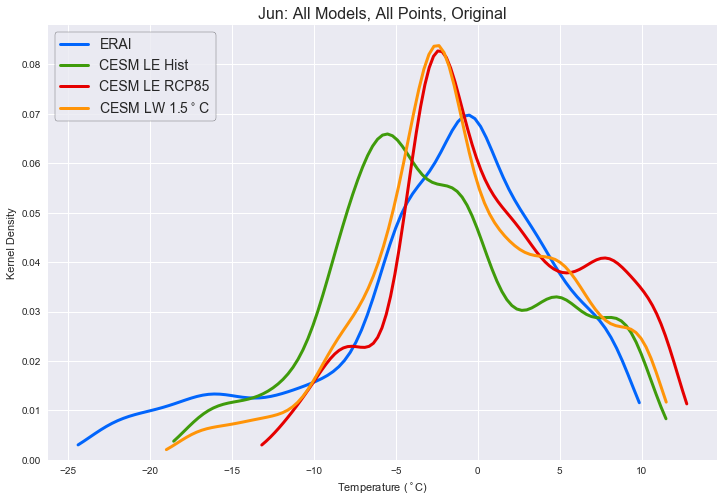

In [10]:
# Plot Original Data
mms = "06"
mmt = "Jun"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Original", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax )

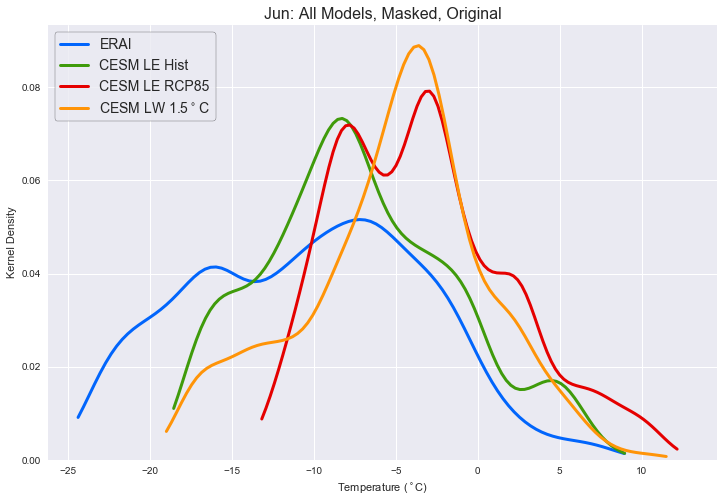

In [11]:
# Plot Original Data, Masked
mms = "06"
mmt = "Jun"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Original", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

June, adjusted
---

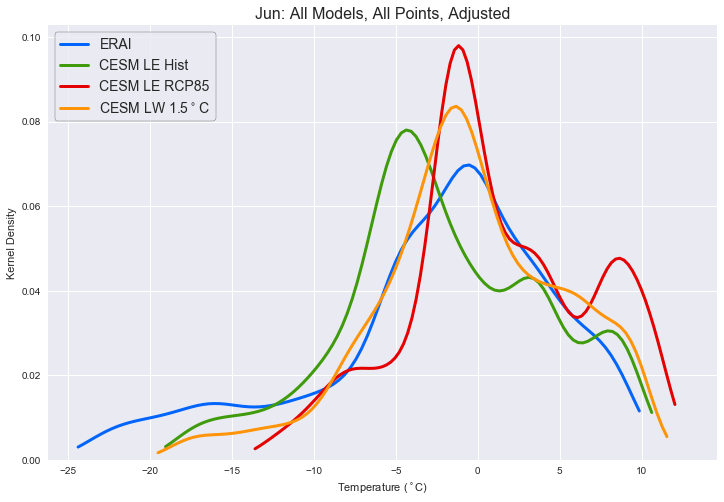

In [12]:
# Plot Adjusted Data
mms = "06"
mmt = "Jun"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

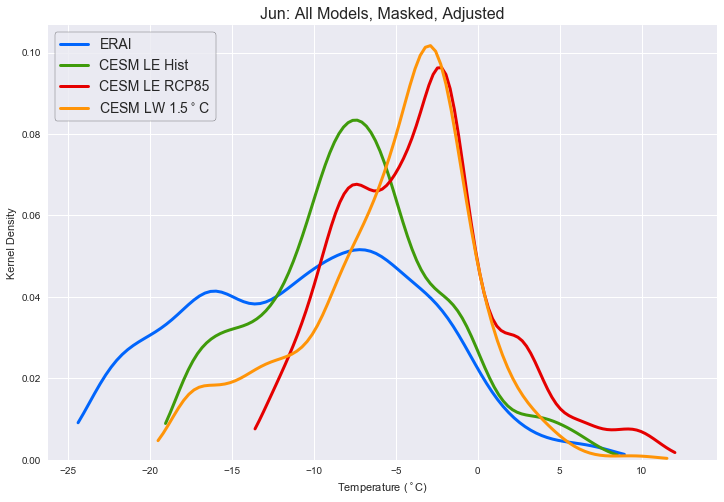

In [13]:
# Plot Adjusted Data, Masked
mms = "06"
mmt = "Jun"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

July
---

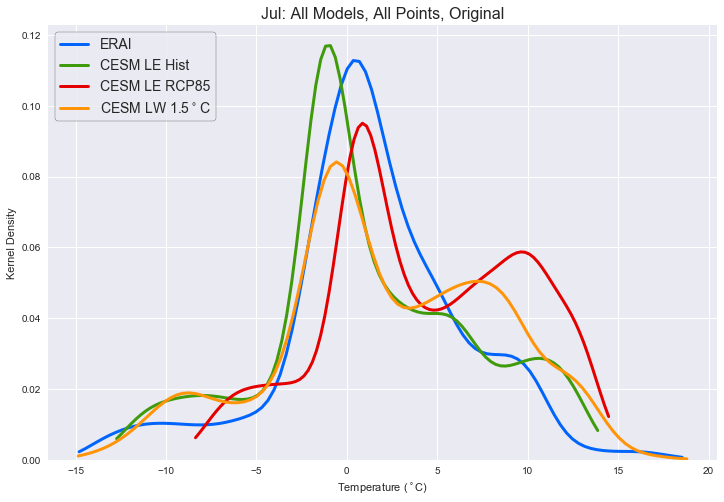

In [14]:
# Plot Original Data
mms = "07"
mmt = "Jul"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Original", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax )

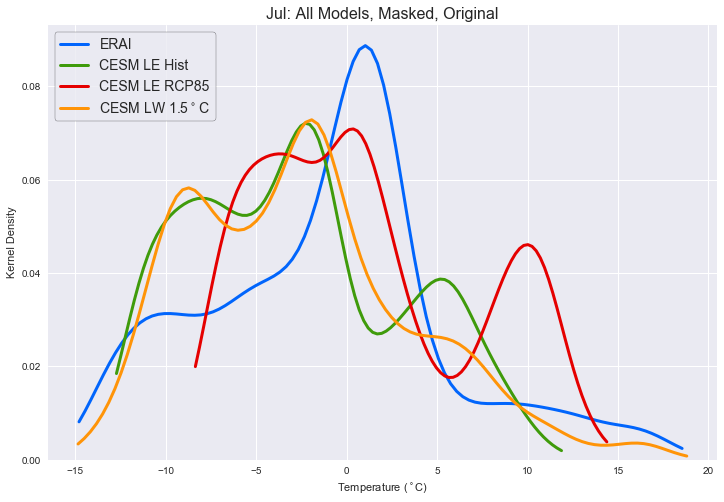

In [15]:
# Plot Original Data, Masked
mms = "07"
mmt = "Jul"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Original", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

July, adjusted
---

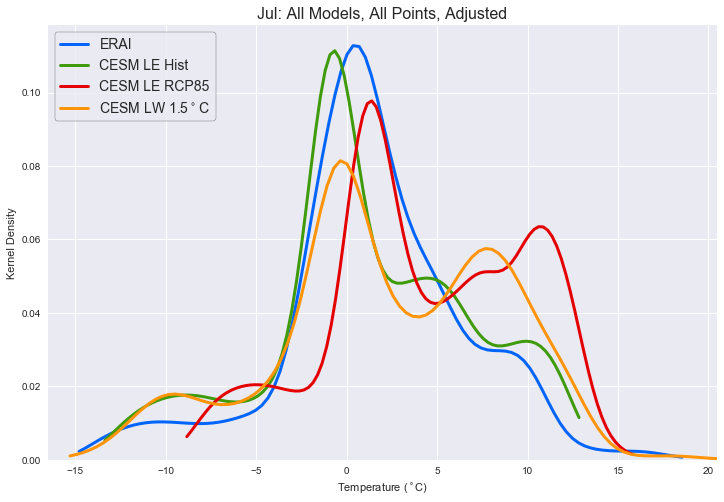

In [16]:
# Plot Adjusted Data
mms = "07"
mmt = "Jul"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

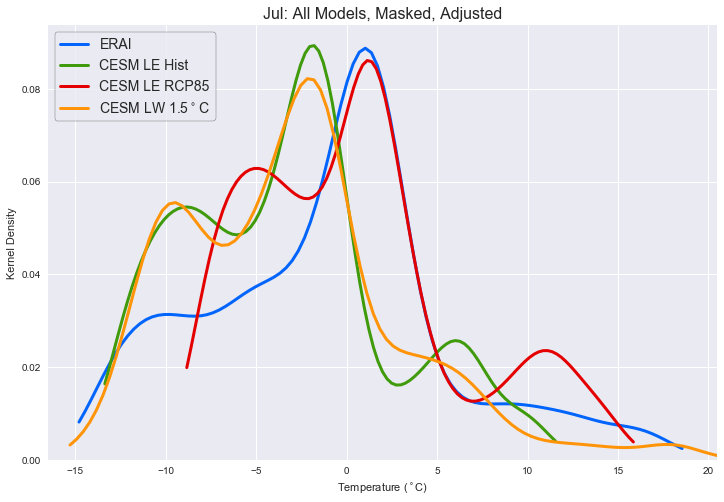

In [17]:
# Plot Adjusted Data, Masked
mms = "07"
mmt = "Jul"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

August
---

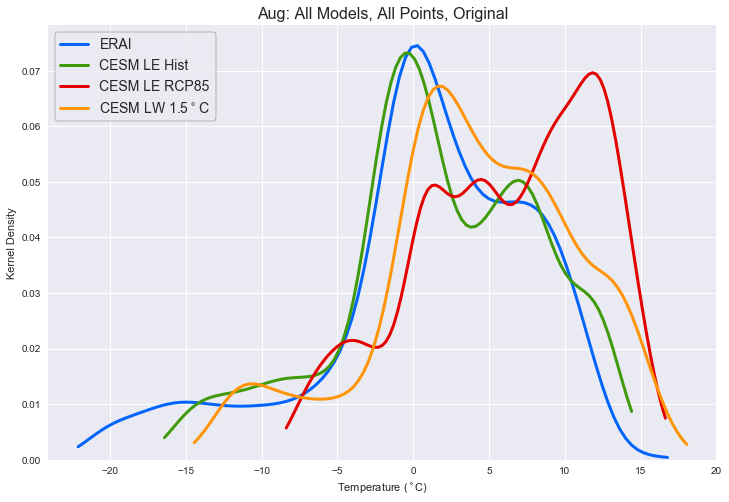

In [18]:
# Plot Original Data
mms = "08"
mmt = "Aug"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Original", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax )

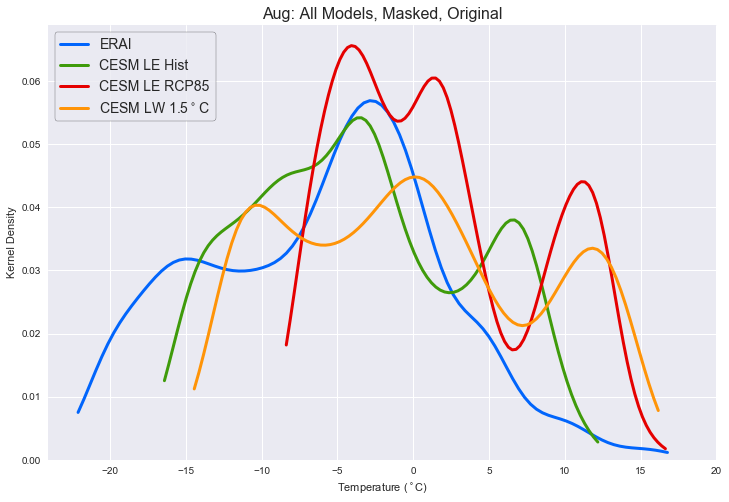

In [19]:
# Plot Original Data, Masked
mms = "08"
mmt = "Aug"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Original", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

August, adjusted
---

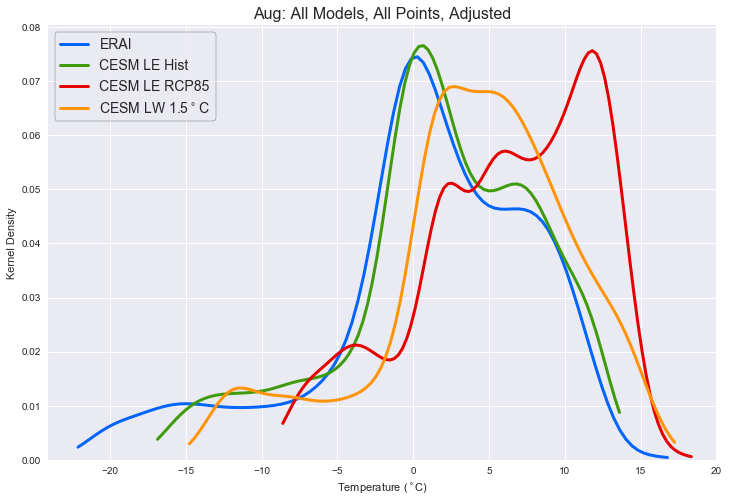

In [20]:
# Plot Adjusted Data
mms = "08"
mmt = "Aug"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

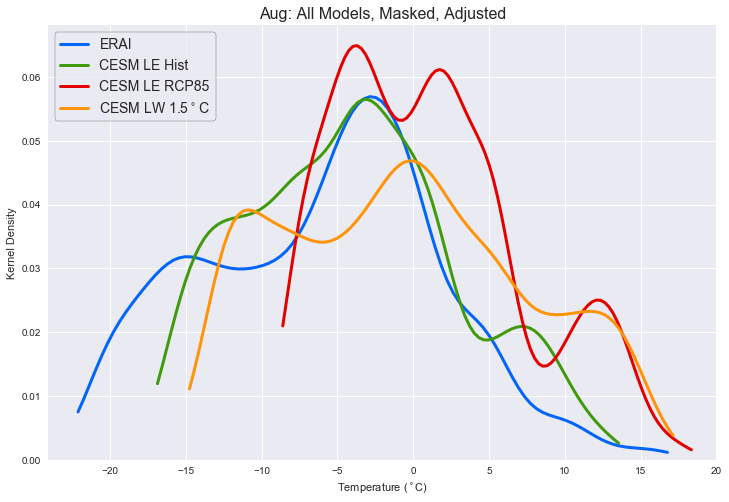

In [21]:
# Plot Adjusted Data, Masked
mms = "08"
mmt = "Aug"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllModels( mms, suff, mask )
plt.title(mmt+": All Models, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax )

Plots By Model, ALL Months
====

ERAI
---

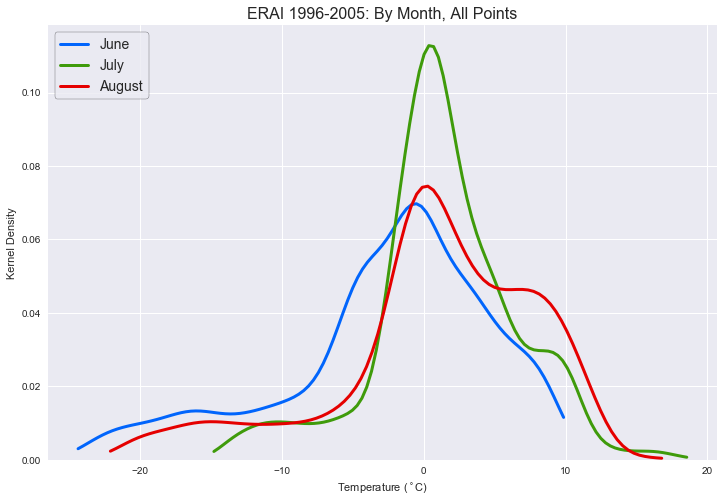

In [22]:
# ERAI, Original, all points
model = "erai"
period = "hist"
yrs = "1996-2005"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax, ['June', 'July', 'August'] )

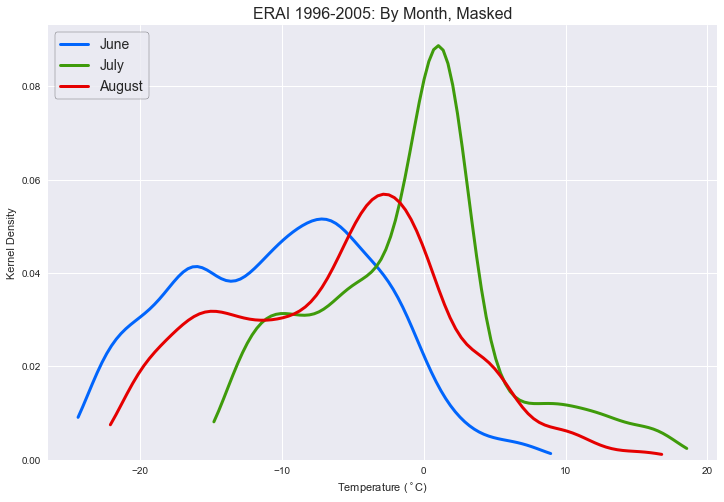

In [23]:
# ERAI, Original, masked
model = "erai"
period = "hist"
yrs = "1996-2005"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LE, Historical
---

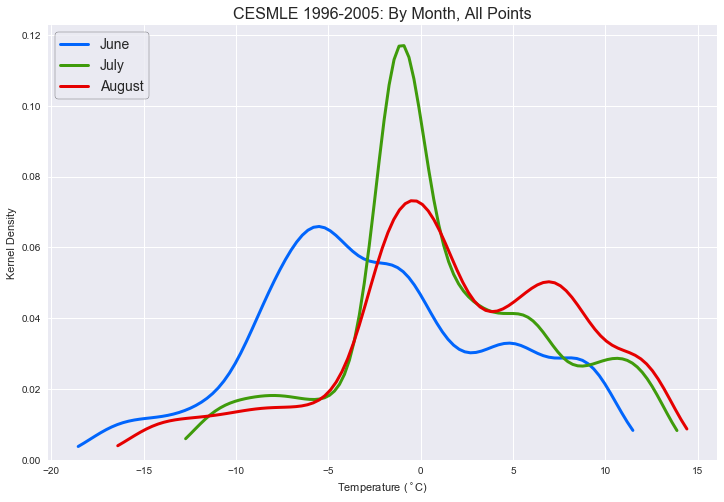

In [24]:
# CESM LE, Historical, Original, all points
model = "cesmle"
period = "hist"
yrs = "1996-2005"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax, ['June', 'July', 'August'] )

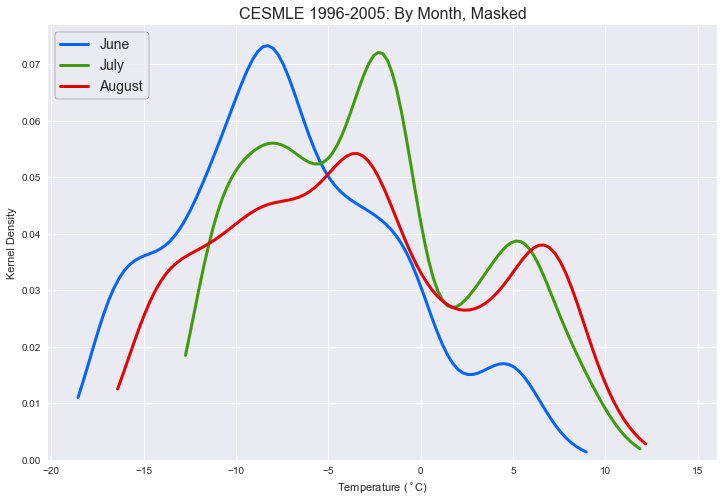

In [25]:
# CESM LE, Historical, Original, masked
model = "cesmle"
period = "hist"
yrs = "1996-2005"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LE, Historical, Adjusted
---

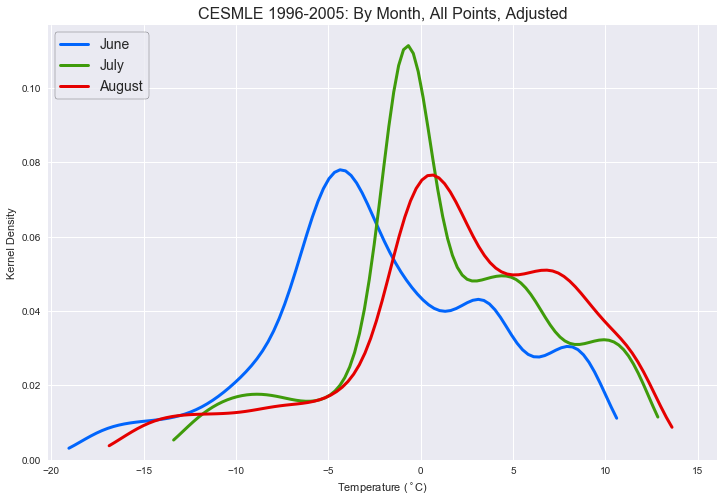

In [26]:
# CESM LE, Historical, Adjusted, all points
model = "cesmle"
period = "hist"
yrs = "1996-2005"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

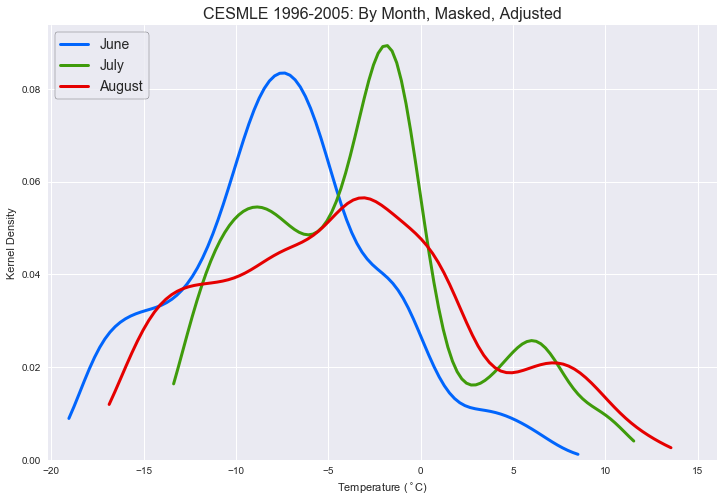

In [27]:
# CESM LE, Historical, Adjusted, masked
model = "cesmle"
period = "hist"
yrs = "1996-2005"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LE, RCP 8.5
---

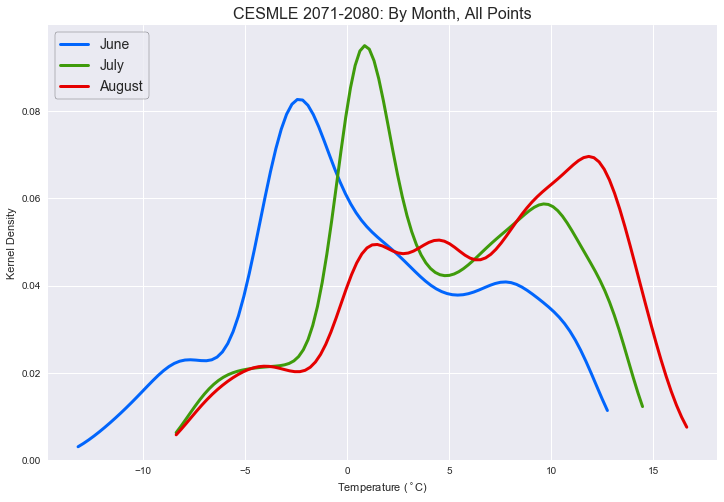

In [28]:
# CESM LE, RCP 8.5, Original, all points
model = "cesmle"
period = "future"
yrs = "2071-2080"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax, ['June', 'July', 'August'] )

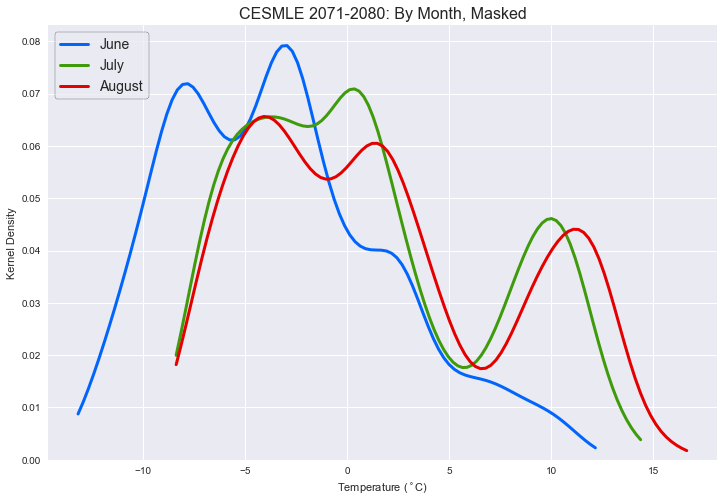

In [29]:
# CESM LE, RCP 8.5, Original, masked
model = "cesmle"
period = "future"
yrs = "2071-2080"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LE, RCP 8.5, Adjusted
---

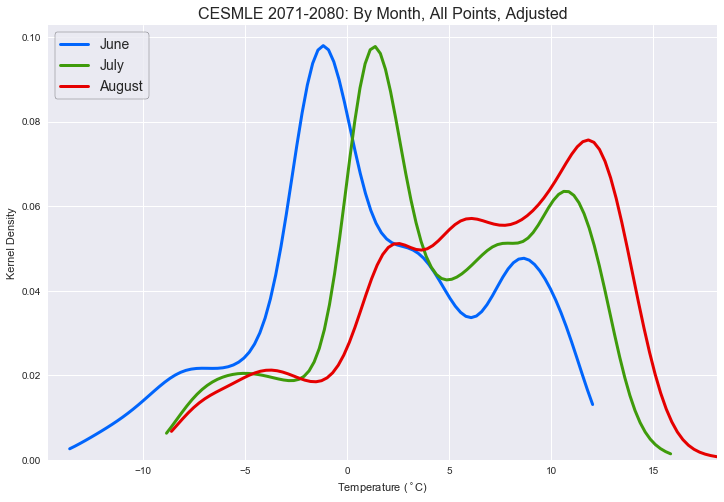

In [30]:
# CESM LE, RCP 8.5, Adjusted, all points
model = "cesmle"
period = "future"
yrs = "2071-2080"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

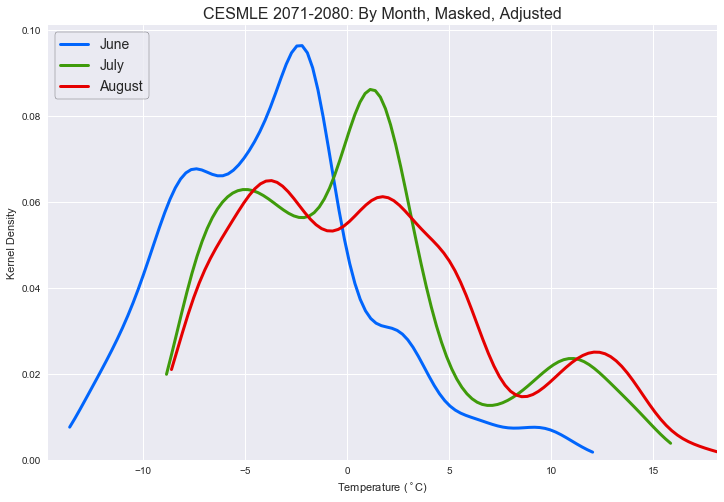

In [31]:
# CESM LE, RCP 8.5, Adjusted, masked
model = "cesmle"
period = "future"
yrs = "2071-2080"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LW, 1pt5degC
---

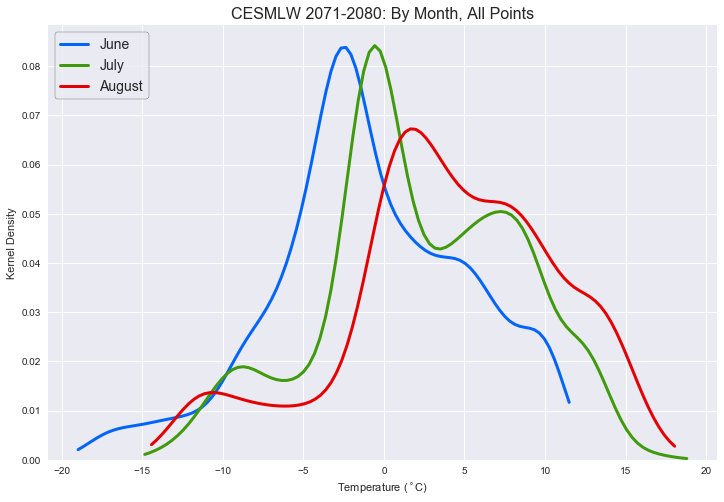

In [32]:
# CESM LW, 1pt5degC, Original, all points
model = "cesmlw"
period = "future"
yrs = "2071-2080"
suff = None
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points", fontsize=16);

xmin, xmax = ax.get_xlim()
addLegend( ax, ['June', 'July', 'August'] )

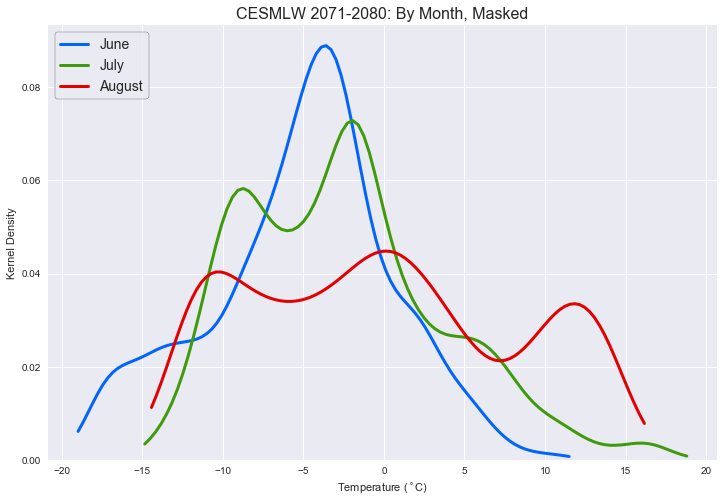

In [33]:
# CESM LW, 1pt5degC, Original, masked
model = "cesmlw"
period = "future"
yrs = "2071-2080"
suff = None
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

CESM LW, 1pt5degC, Adjusted
---

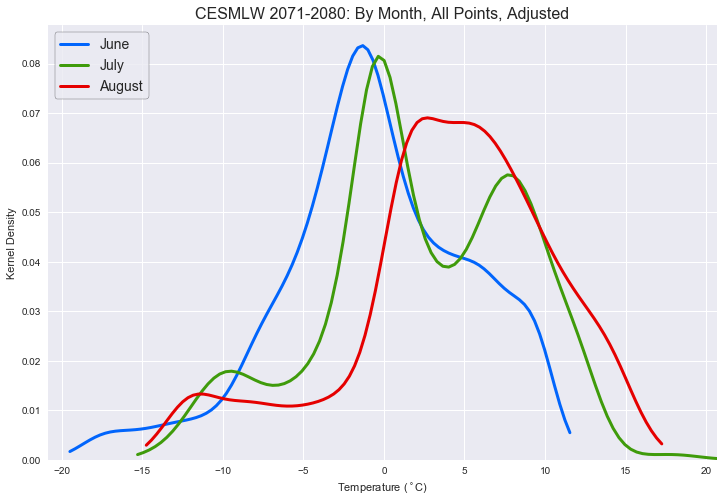

In [34]:
# CESM LW, 1pt5degC, Adjusted, all points
model = "cesmlw"
period = "future"
yrs = "2071-2080"
suff = "adj"
mask = None

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, All Points, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

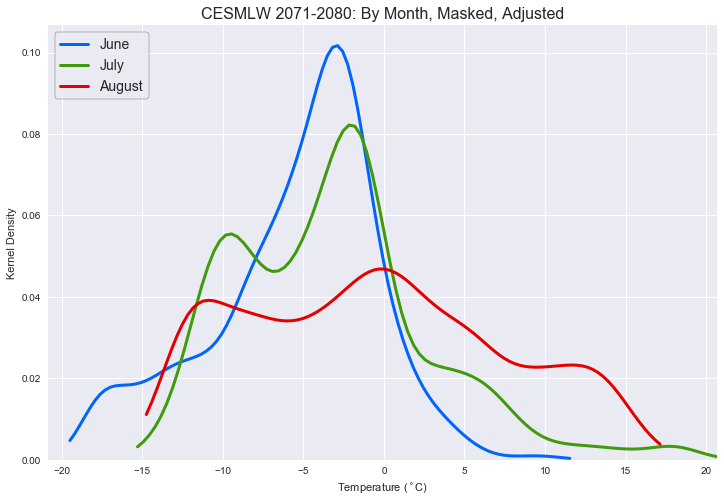

In [35]:
# CESM LW, 1pt5degC, Adjusted, masked
model = "cesmlw"
period = "future"
yrs = "2071-2080"
suff = "adj"
mask = True

fig, ax = plt.subplots( figsize=(12,8))
plotAllMonths( model, period, yrs, suff, mask )

plt.title(model.upper()+" "+yrs+": By Month, Masked, Adjusted", fontsize=16);

ax.set_xlim( xmin, xmax )
addLegend( ax, ['June', 'July', 'August'] )

Try a 2-d KDE plot!
---

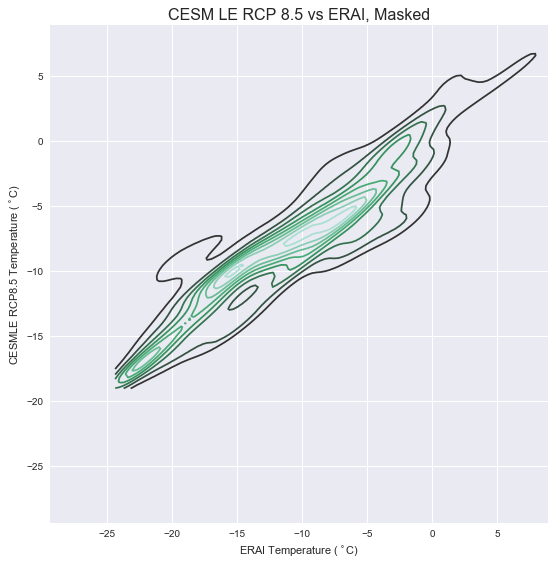

In [46]:
suff = "adj"
mask = True
mms = "06"

XeraiH   = loadData( "erai",   mms, "hist",   None, mask )
XcesmleH = loadData( "cesmle", mms, "hist", suff, mask )
# XcesmleF = loadData( "cesmle", mms, "future", suff, mask )
# XcesmlwF = loadData( "cesmlw", mms, "hist",   suff, mask )

fig, ax = plt.subplots( figsize=(12,8))
plotData2D( XeraiH, XcesmleH )
xmin, xmax = ax.get_xlim()
xmin = xmin - 5
ax.set_aspect('equal', 'box')
ax.set_xlim( xmin, xmax )
ax.set_ylim( xmin, xmax )

plt.title("CESM LE RCP 8.5 vs ERAI, Masked", fontsize=16);
plt.xlabel('ERAI Temperature ($^\circ$C)');
plt.ylabel('CESMLE RCP8.5 Temperature ($^\circ$C)');

fig.tight_layout()